In [7]:
# Xem các cột dữ liệu đang có
import pandas as pd
df = pd.read_csv("synthetic_transportation_data.csv")
df.head()




,datetime,station_id,line_id,passenger_count,weather,temperature,hour,day,month,year,weekday,is_weekend,is_holiday
0,2023-12-04 08:42:00,S4,L2,21,rainy,16.1,8,4,12,2023,0,0,0
1,2023-11-09 08:47:00,S5,L3,21,sunny,26.9,8,9,11,2023,3,0,0
2,2023-11-06 14:50:00,S3,L2,22,sunny,28.7,14,6,11,2023,0,0,0
3,2023-09-06 07:04:00,S5,L2,22,rainy,25.4,7,6,9,2023,2,0,0
4,2023-07-08 08:13:00,S5,L3,18,sunny,27.6,8,8,7,2023,5,1,0


In [ ]:
holiday_df = df[df["is_holiday"] == 1]
holiday_df.head()  # Hiển thị vài dòng đầu tiên


,datetime,station_id,line_id,passenger_count,weather,temperature,hour,day,month,year,weekday,is_weekend,is_holiday
32,2023-04-29 19:32:00,S4,L3,25,sunny,26.0,19,29,4,2023,5,1,1
33,2023-03-09 10:03:00,S1,L2,13,sunny,29.7,10,9,3,2023,3,0,1
37,2023-06-15 08:08:00,S5,L2,18,cloudy,27.8,8,15,6,2023,3,0,1
66,2023-06-16 18:36:00,S2,L3,26,cloudy,30.0,18,16,6,2023,4,0,1
85,2023-02-26 06:19:00,S1,L1,16,sunny,19.2,6,26,2,2023,6,1,1


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20396\2404287627.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day_name", y="passenger_count", data=holiday_df, palette="Set2")


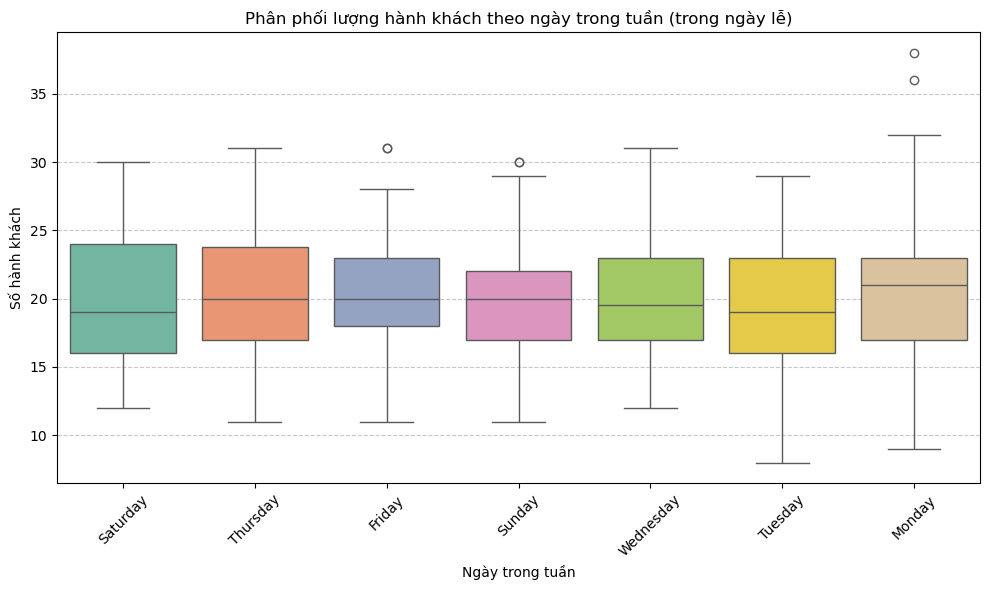

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("synthetic_transportation_data.csv")
holiday_df = df[df["is_holiday"] == 1].copy()
holiday_df["datetime"] = pd.to_datetime(holiday_df["datetime"])
holiday_df["day_name"] = holiday_df["datetime"].dt.day_name()

# Vẽ biểu đồ boxplot theo ngày trong tuần
plt.figure(figsize=(10, 6))
sns.boxplot(x="day_name", y="passenger_count", data=holiday_df, palette="Set2")
plt.title("Phân phối lượng hành khách theo ngày trong tuần (trong ngày lễ)")
plt.xlabel("Ngày trong tuần")
plt.ylabel("Số hành khách")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
# Khám phá dữ liệu cơ bản
df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         5000 non-null   object 
 1   station_id       5000 non-null   object 
 2   line_id          5000 non-null   object 
 3   passenger_count  5000 non-null   int64  
 4   weather          5000 non-null   object 
 5   temperature      5000 non-null   float64
 6   hour             5000 non-null   int64  
 7   day              5000 non-null   int64  
 8   month            5000 non-null   int64  
 9   year             5000 non-null   int64  
 10  weekday          5000 non-null   int64  
 11  is_weekend       5000 non-null   int64  
 12  is_holiday       5000 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 507.9+ KB


(None,
        passenger_count  temperature         hour          day        month  \
 count      5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
 mean         20.042000    27.119140    11.394800    15.745800     6.593400   
 std           4.457512     4.955382     6.886277     8.911648     3.403409   
 min           5.000000    10.600000     0.000000     1.000000     1.000000   
 25%          17.000000    23.800000     5.000000     8.000000     4.000000   
 50%          20.000000    27.100000    11.000000    16.000000     7.000000   
 75%          23.000000    30.500000    17.000000    24.000000    10.000000   
 max          38.000000    46.500000    23.000000    31.000000    12.000000   
 
          year      weekday   is_weekend   is_holiday  
 count  5000.0  5000.000000  5000.000000  5000.000000  
 mean   2023.0     3.019600     0.290400     0.096200  
 std       0.0     2.003102     0.453992     0.294895  
 min    2023.0     0.000000     0.000000     0.000000  


In [4]:
# Kiểm tra null và xử lý
df.isnull().sum()

# Không cần mã hóa vì chưa có biến văn bản nào cần xử lý ngay
# Nếu cần: pd.get_dummies(df['weather'])


datetime           0
station_id         0
line_id            0
passenger_count    0
weather            0
temperature        0
hour               0
day                0
month              0
year               0
weekday            0
is_weekend         0
is_holiday         0
dtype: int64

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Tạo features đơn giản để minh họa
X = df[["hour", "is_weekend", "is_holiday", "temperature"]]
y = df["passenger_count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [4]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MAE: 3.537380311207906
R2: -0.004367438510566091


# Giả lập phản hồi: Mô hình hoạt động tốt vào ngày thường, nhưng chưa chính xác vào ngày lễ
print("🎯 Cần cải tiến mô hình với biến tương tác hoặc thêm dữ liệu đặc biệt (sự kiện).")
